In [1]:
import requests

url = 'https://github.com/wikibook/python-fir-data-analysis-rev/raw/master/readme.txt'

r = requests.get(url)
file_name = 'C:\\users\\student\\mypy\\data\\readme.txt'

with open(file_name, 'wb') as f:
    f.write(r.content)

In [4]:
import os
os.path.isfile(file_name)

True

In [8]:
!type C:\\users\\student\\mypy\\data\\missing_data_test.csv

연도,제품1,제품2,제품3,제품4
2015,250,150,NaN,NaN
2016,200,160,170,NaN
2017,150,200,100,150
2018,120,230,130,170
2019,NaN,250,140,NaN


In [9]:
import pandas as pd

data_file = 'C:\\users\\student\\mypy\\data\\missing_data_test.csv'

df = pd.read_csv(data_file, encoding = 'cp949', index_col = '연도')
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [10]:
df.isnull()

,제품1,제품2,제품3,제품4
연도,,,,
2015,False,False,True,True
2016,False,False,False,True
2017,False,False,False,False
2018,False,False,False,False
2019,True,False,False,True


In [11]:
df.isnull().sum()
#True = 1, False = 0이므로 True 수 (null인 요소) 확인 가능

제품1    1
제품2    0
제품3    1
제품4    3
dtype: int64

In [12]:
#index 2019인 행 제거
df.drop(index=[2019])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [13]:
df.drop(columns = ['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [14]:
df.drop(index = [2018, 2019], columns = ['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200


In [15]:
#결측치 있는 행이나 열 제거

df.dropna() #인자 default는 axis = 0 (행 제거)

,제품1,제품2,제품3,제품4
연도,,,,
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [16]:
df.dropna(axis=0, subset=['제품1'])
#subset을 사용하면 제품1 중 결측치가 있는 행만 제거할 수 있음

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [17]:
df.dropna(axis=1)
#결측치 있는 열 제거

,제품2
연도,
2015,150
2016,160
2017,200
2018,230
2019,250


In [18]:
df.dropna(axis=1, subset=[2015])
#똑같이 2015 행에 결측치 있는 열 제거

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [19]:
df.dropna(axis=1, subset=[2016,2019])
#물론 subset 여러개도 가능

,제품2,제품3
연도,,
2015,150,NaN
2016,160,170.0
2017,200,100.0
2018,230,130.0
2019,250,140.0


In [20]:
#fillna 결측치 채우기
df.fillna(0)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,0.0,0.0
2016,200.0,160,170.0,0.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,0.0,250,140.0,0.0


In [21]:
df.fillna(method='bfill')
#bfill: 해당 열 다음 행 값으로 채움 - 없으면 놔둠

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,170.0,150.0
2016,200.0,160,170.0,150.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [22]:
df.fillna(method='ffill')
#ffill: 이전 값으로

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,120.0,250,140.0,170.0


In [23]:
values = {'제품1': 100, '제품4': 400}
df.fillna(value=values)
#특정 값 채우기 - 제품1과 제품4의 결측치는 다 해당 값으로 채운다는 뜻

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,400.0
2016,200.0,160,170.0,400.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,100.0,250,140.0,400.0


In [27]:
data_file = 'C:\\users\\student\\mypy\\data\\total_sales_data.csv'

df_sales = pd.read_csv(data_file, encoding = 'cp949') #csv는 직접 만들면 기본적으로 cp949?
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


In [28]:
df_sales.info()
'''
정보 보기

index는 0에서 8까지 9개
column은 총 5개
각 열의 데이터타입
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     9 non-null      object
 1   제품종류    9 non-null      object
 2   모델명     9 non-null      object
 3   판매      9 non-null      int64 
 4   재고      9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


In [29]:
df_sales['매장명'].value_counts()
#value_counts(): 해당 열에 들어있는 값의 각 개수

B    3
A    3
C    3
Name: 매장명, dtype: int64

In [30]:
df_sales['제품종류'].value_counts()

스마트폰    5
TV      4
Name: 제품종류, dtype: int64

In [31]:
#피벗 테이블 pivot table
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


In [34]:
df_sales.pivot_table(index=['매장명', '제품종류', '모델명'],
                    values=['판매', '재고'],
                    aggfunc='sum')

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

In [36]:
df_sales.pivot_table(index=['매장명'],
                     columns=['제품종류'],
                    values=['판매', '재고'],
                    aggfunc='sum')

#index: ~~별로
#columns: !!에 따른
#values: ##의 값을
#aggfunc - sum: 수량 합 출력
#aggfunc - count: 종류 몇 가지인지 출력

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

In [39]:
df_sales.pivot_table(index=['매장명'],
                    columns=['제품종류'],
                     values=['판매','재고'],
                    aggfunc='count')

재고      판매     
제품종류 TV 스마트폰 TV 스마트폰
매장명                 
A     1    2  1    2
B     1    2  1    2
C     2    1  2    1

In [42]:
#워드 클라우드 데이터 시각화 word cloud
!pip install wordcloud

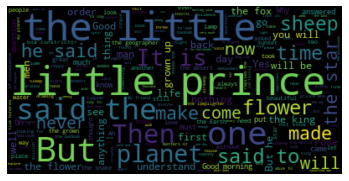

In [80]:
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt

file_name = 'C:\\users\\student\\mypy\\data\\littleprince_djvu.txt'

# cp949로 열면 에러 - utf-8로 파일 열어줌
with open(file_name, encoding='utf-8') as f:
    text = f.read()
    
wordcloud_image = wc().generate(text)

plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()

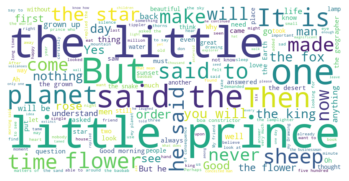

In [49]:
wordcloud_image = wc(background_color='white',
                     max_font_size=300,
                     width=800, height=400).generate(text)
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
#해당 이미지 저장

image_file_name = 'C:\\users\\student\\mypy\\figures\\little_prince.png'

wordcloud_image.to_file(image_file_name)
plt.show()

In [63]:
word_count_file = 'C:\\users\\student\\mypy\\data\\word_count.csv'

word_count = pd.read_csv(word_count_file, index_col='word')
word_count.head(5)

#csv 파일의 index_col이 한글일 땐 unicodedecodeerror 발생

,freq
word,
the,213
to,99
and,58
a,53
you,43


In [64]:
word_count['freq'][0:5]

word
the    213
to      99
and     58
a       53
you     43
Name: freq, dtype: int64

In [65]:
type(word_count['freq'])
#word_count['freq']의 데이터 타입은 pd.Series

pandas.core.series.Series

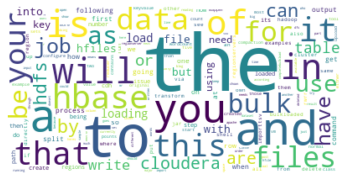

In [83]:
#korean_font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
from wordcloud import WordCloud as wc

wc = wc(background_color='white')

freq = word_count['freq'] #pandas의 Series 형식
wordcloud_image = wc.generate_from_frequencies(freq)

plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
#실전 데이터 - 서울시 업무추진비 데이터 수집/분석
import requests
import os
import pathlib

def get_seoul_expense_list(extension, year, data_folder): #확장자, 연도, 내려받을 폴더
    expense_list_year_url = 'https://github.com/seoul-opengov/opengov/raw/master/expense_list' + str(year) + '/' #url 지정
    expense_list_year_dir = data_folder + str(year) + '/' #받을 폴더 지정
    if(os.path.isdir(expense_list_year_dir)): #폴더 존재하지 않으면 생성
        print('데이터 폴더({0})가 이미 있습니다. {0}년 데이터 다운로드 시작.'.format(year))
    else:
        print('데이터 폴더({0})가 없습니다. 폴더 생성 후 {0}년 데이터 다운로드 시작.'.format(year))
        pathlib.Path(expense_list_year_dir).mkdir(parents=True, exist_ok=True)
        
    for k in range(12):
        file_name = '{0}{1:02d}_expense_list.{2}'.format(year, k+1, extension)
        url = expense_list_year_url + file_name
        print(url)
        r = requests.get(url)
        with open(expense_list_year_dir + file_name, 'wb') as f:
            f.write(r.content)
            print('success')

In [93]:
extension = 'csv'
year = 2017
data_folder = 'C:\\users\\student\\mypy\\data\\seoul_expense\\'

get_seoul_expense_list(extension, year, data_folder)
#책에 나온 2016년 정보는 삭제된 듯 - 2017년도 데이터로 진행

데이터 폴더(2017)가 없습니다. 폴더 생성 후 2017년 데이터 다운로드 시작.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201701_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201702_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201703_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201704_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201705_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201706_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201707_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201708_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201709_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw

In [96]:
#잘 받아졌는지 확인

import glob
path_name = 'C:\\users\\student\\mypy\\data\\seoul_expense/2017/'

file_name_for_glob = path_name + '*list.csv'

csv_files = []
for csv_file in glob.glob(file_name_for_glob):
    csv_files.append(csv_file.split('\\')[-1]) #파일 이름만 추출

print(path_name)
csv_files

C:\users\student\mypy\data\seoul_expense/2017/


['201701_expense_list.csv',
 '201702_expense_list.csv',
 '201703_expense_list.csv',
 '201704_expense_list.csv',
 '201705_expense_list.csv',
 '201706_expense_list.csv',
 '201707_expense_list.csv',
 '201708_expense_list.csv',
 '201709_expense_list.csv',
 '201710_expense_list.csv',
 '201711_expense_list.csv',
 '201712_expense_list.csv']

In [97]:
#2017, 2018, 2019 한 번에 데이터 받기
data_folder = 'C:\\users\\student\\mypy\\data\\seoul_expense\\'

years = [2017, 2018, 2019]

extension = 'csv'
for year in years:
    get_seoul_expense_list(extension, year, data_folder)
    
print('done')

데이터 폴더(2017)가 이미 있습니다. 2017년 데이터 다운로드 시작.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201701_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201702_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201703_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201704_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201705_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201706_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201707_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201708_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201709_expense_list.csv
success
https://github.com/seoul-opengov/opengov/raw/mast

In [100]:
#잘 받아졌는지 확인

import pprint
folder = 'C:\\users\\student\\mypy\\data\\seoul_expense\\'

for year in years:
    path_name = folder + str(year) + '\\'
    file_name_for_glob = path_name + '*list.csv'

    csv_files = []
    for csv_file in glob.glob(file_name_for_glob):
        csv_files.append(csv_file.split('\\')[-1]) #파일 이름만 추출

    print(path_name)
    pprint.pprint(csv_files)

C:\users\student\mypy\data\seoul_expense\2017\
['201701_expense_list.csv',
 '201702_expense_list.csv',
 '201703_expense_list.csv',
 '201704_expense_list.csv',
 '201705_expense_list.csv',
 '201706_expense_list.csv',
 '201707_expense_list.csv',
 '201708_expense_list.csv',
 '201709_expense_list.csv',
 '201710_expense_list.csv',
 '201711_expense_list.csv',
 '201712_expense_list.csv']
C:\users\student\mypy\data\seoul_expense\2018\
['201801_expense_list.csv',
 '201802_expense_list.csv',
 '201803_expense_list.csv',
 '201804_expense_list.csv',
 '201805_expense_list.csv',
 '201806_expense_list.csv',
 '201807_expense_list.csv',
 '201808_expense_list.csv',
 '201809_expense_list.csv',
 '201810_expense_list.csv',
 '201811_expense_list.csv',
 '201812_expense_list.csv']
C:\users\student\mypy\data\seoul_expense\2019\
['201901_expense_list.csv',
 '201902_expense_list.csv',
 '201903_expense_list.csv',
 '201904_expense_list.csv',
 '201905_expense_list.csv',
 '201906_expense_list.csv',
 '201907_expense_li

In [104]:
#데이터 처리

data_file = 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201701_expense_list.csv'

with open(data_file, encoding='utf-8') as f:
    line1 = f.readline()
    line2 = f.readline()
    line3 = f.readline()
    
    print(line1)
    print(line2)
    print(line3)

﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-26 13:10","동해일식 (중구 무교동)","기본소득과 장애인복지 논의간담회","장애인복지정책팀장 외 2명",카드,76000

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-25 22:41","김앤장 (중구 무교로)","장애인단체 활동지원 논의간담회","장애인복지정책과장 외 3명",카드,102000



In [105]:
#각 열 데이터 개수 확인

line1_len = len(line1.split(','))
line2_len = len(line2.split(','))
line3_len = len(line3.split(','))

print('1: ', line1_len, '\n2: ', line2_len, '\n3: ', line3_len)

1:  20 
2:  20 
3:  20


In [110]:
#데이터 개수 확인 함수

'''
ex) line = 2832320, "2016년", http, 서울시본청, 서울특별시장, "매일한우타운, 예당로길", 25만원

이 경우 line.split('"')는
['2832320, ',
'2016년',
', http, 서울시본청, 서울특별시장, ',
'매일한우타운, 예당로길',
'25만원']

이런 식으로 됨 - ,가 기준이 아닌 "가 기준이 되어 split
index가 짝수인 부분은 "" 바깥에 있던 요소들
index가 홀수인 부분은 "" 안에 있는 요소들, 따라서 그 중 ,가 포함되어 있으면 replace 이용해 제거

불필요한 ,을 제거한 요소들은 lin_rep_list에 다 append
2832320, 2016년, http, 서울시본청, 서울특별시장, 매일한우타운 예당로길, 25만원
위처럼 ""도 없어지고 매일한우타운, 예당로길의 ,도 사라짐 - 다시 join한 후 split(',')하여 개수 세기
'''

def get_value_count(line):
    line_rep_list=[]
    for k, x in enumerate(line.split('"')):
        if(k%2 != 0):
            x = x.replace(',', '')
        line_rep_list.append(x)

    line_rep_str = ''.join(line_rep_list)

    return len(line_rep_str.split(','))

In [111]:
line1_len = get_value_count(line1)
line2_len = get_value_count(line2)
line3_len = get_value_count(line3)

print('1: ', line1_len, '\n2: ', line2_len, '\n3: ', line3_len)

1:  20 
2:  20 
3:  20


In [33]:
#p.565 첫째 줄의 누락된 열 이름 수정 - 현재 데이터에 누락은 없지만 한글로 바꾸기 위해 작성
def change_csv_first_line(old, new):
    with open(old, encoding='utf-8') as f:
        lines = f.read().splitlines() #splitlines는 \n 기준으로 나눔
    
    #첫째 줄 변경
    lines[0] = 'nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액'
    
    with open(new, 'w', encoding='utf-8') as f:
        f.write('\n'.join(lines))
        #다시 개행문자 넣어서 합치고 파일 쓰기

In [34]:
#2017년 1월 데이터 적용
old = 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201701_expense_list.csv'
new = 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201701_expense_list_new.csv'

change_csv_first_line(old, new)

In [35]:
#확인
with open(new, encoding='utf-8') as f:
    for k in range(3):
        print(f.readline())

nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-26 13:10","동해일식 (중구 무교동)","기본소득과 장애인복지 논의간담회","장애인복지정책팀장 외 2명",카드,76000

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-25 22:41","김앤장 (중구 무교로)","장애인단체 활동지원 논의간담회","장애인복지정책과장 외 3명",카드,102000



In [36]:
#다 적용하기
years = [2017, 2018, 2019]
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for year in years:
    path_name = 'C:\\users\\student\\mypy\\data\\seoul_expense\\' + str(year) + '\\\\'
    for month in months:
        old = path_name + str(year) + month + '_expense_list.csv'
        new = path_name + str(year) + month + '_expense_list_new.csv'
        change_csv_first_line(old, new)

#file_name = '{0}{1:02d}_expense_list_new.csv'.format(year, k+1) 파일 이름 이렇게 하면 months 안 만들어도 됨, 깔끔

In [37]:
#확인
import glob
import pprint

for year in years:
    new_csv_files = []
    path_name = 'C:\\users\\student\\mypy\\data\\seoul_expense\\' + str(year) + '\\\\'
    
    file_name_for_glob = path_name + '*_new.csv'
    #폴더 내에서 _new 가 붙은 파일만 지장
    
    for new_csv_file in glob.glob(file_name_for_glob):
        new_csv_files.append(new_csv_file.split('\\\\')[-1])
        #폴더명 전체 중 경로 다 빼고 파일명만
        
    print("새로운 파일: ")
    pprint.pprint(new_csv_files)

새로운 파일: 
['C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201701_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201702_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201703_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201704_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201705_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201706_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201707_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201708_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201709_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201710_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\201711_expense_list_new.csv',
 'C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\2

In [6]:
import pandas as pd
expense_list2017_dir = 'C:\\users\\student\mypy\\data\\seoul_expense\\2017\\'
file_name = '201701_expense_list_new.csv'

df = pd.read_csv(expense_list2017_dir + file_name)
#2017년 1월 데이터만 가져오기

In [7]:
df.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [8]:
#2017년 1월부터 12월까지 다 가져와서 하나로 통합하기
year = 2017
expense_list_year_dir = 'C:\\users\\student\\mypy\\data\\seoul_expense\\' + str(year) + '\\\\'

df_year = pd.DataFrame()
for k in range(12):
    file_name = '{0}{1:02d}_expense_list_new.csv'.format(year, k+1)
    
    df_month = pd.read_csv(expense_list_year_dir + file_name)
    #월별로 불러온 뒤
    df_year = df_year.append(df_month, ignore_index = True)
    #통합된 df의 순서대로 index 할당하기 위해 ignore_index = True
    

In [9]:
df_year.head(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [10]:
df_year.tail(2)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
70130,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-05 18:21,삿뽀로(서오릉로 4),인증 관련업무 직원 격려 간담회,병원장 외 33명,카드,820000
70131,14292506,2017년 12월 사업소_은평병원_원무과 업무추진비 내역,http://opengov.seoul.go.kr/public/14292506,사업소,은평병원,원무과,NaN,NaN,2017,12,NaN,NaN,NaN,원무과,2017-12-06 18:00,스타벅스(응암동 96-1),전문의 및 전공의 격려 다과회,병원장 외 11명,카드,440000


In [11]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70132 entries, 0 to 70131
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nid     70132 non-null  int64  
 1   제목      70132 non-null  object 
 2   url     70132 non-null  object 
 3   부서레벨1   70132 non-null  object 
 4   부서레벨2   70074 non-null  object 
 5   부서레벨3   61262 non-null  object 
 6   부서레벨4   17939 non-null  object 
 7   부서레벨5   3474 non-null   object 
 8   집행연도    70132 non-null  int64  
 9   집행월     70132 non-null  int64  
 10  예산      3108 non-null   float64
 11  집행      2805 non-null   float64
 12  구분      1259 non-null   object 
 13  부서명     70053 non-null  object 
 14  집행일시    70132 non-null  object 
 15  집행장소    69360 non-null  object 
 16  집행목적    70110 non-null  object 
 17  대상인원    69597 non-null  object 
 18  결제방법    69929 non-null  object 
 19  집행금액    70132 non-null  int64  
dtypes: float64(2), int64(4), object(14)
memory usage: 10.7+ MB


In [12]:
df_year.isna().sum()

nid          0
제목           0
url          0
부서레벨1        0
부서레벨2       58
부서레벨3     8870
부서레벨4    52193
부서레벨5    66658
집행연도         0
집행월          0
예산       67024
집행       67327
구분       68873
부서명         79
집행일시         0
집행장소       772
집행목적        22
대상인원       535
결제방법       203
집행금액         0
dtype: int64

In [17]:
#부서레벨3, 4, 5 그리고 예산, 집행, 구분의 NaN 값이 너무 많음

df_year_drop = df_year.drop(['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분'], axis=1)
#처음에 이름 입력할 시 ex) 'nid, url, 부서레벨3, ...' 이런 식으로 입력한 뒤 split 했기 때문에 앞의 공백도 포함됨
#그래서 nid 는 문제 없고 뒤의 요소들은 이름이 달라 오류 발생 - 만들 때부터 공백 없이 해주니 오류 해결
df_year_drop.head(5)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000


In [38]:
#필요없는 부분 제거한 뒤 다시 저장
year = 2017

expense_list_year_dir = 'C:\\users\\student\\mypy\\data\\seoul_expense\\' + str(year) + '\\\\'

expense_list_tidy_file = '{}_expense_list_tidy.csv'.format(year)
df_year_drop.to_csv(expense_list_year_dir + expense_list_tidy_file, index=False, encoding='utf-8-sig')
#to_csv 인자에 encoding = 'utf-8-sig' 넣어줘야 파일 직접 열었을 때 열림 / 이유 모름

In [39]:
#확인
import os

file_name = expense_list_year_dir + expense_list_tidy_file
print(file_name)
os.path.isfile(file_name)

C:\users\student\mypy\data\seoul_expense\2017\\2017_expense_list_tidy.csv


True

In [41]:
#!type C:\\users\\student\\mypy\\data\\seoul_expense\\2017\\2017_expense_list_tidy.csv

tmpdir = 'C:\\users\\student\mypy\\data\\seoul_expense\\2017\\'
file_name = '2017_expense_list_tidy.csv'

pd.read_csv(expense_list2017_dir + file_name)[:5]

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000
4,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-23 15:10,서울시청신매점,부서운영에 필요한 음료수 구매,장애인복지정책과직원,카드,16000


In [47]:
#원하는 열의 데이터만 선택해서 새로운 파일로 저장하는 함수
import pandas as pd

def select_columns_save_file(year, data_folder, drop_columns_list): #연도, 폴더 경로, 제외할 열 이름
    expense_list_year_dir = data_folder + str(year) + '\\\\'
    expense_list_tidy_file = '{0}_expense_list_tidy.csv'.format(year)
    
    df_year = pd.DataFrame()
    for k in range(12):
        file_name = '{0}{1:02d}_expense_list_new.csv'.format(year, k+1)
        
        df_month = pd.read_csv(expense_list_year_dir + file_name)
        
        df_year = df_year.append(df_month, ignore_index = True)
        
    df_year_drop = df_year.drop(columns = drop_columns_list)
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name, index=False, encoding = 'utf-8-sig')
    
    print('{0} 파일 생성 완료'.format(expense_list_tidy_file))

In [49]:
data_folder = 'C:\\users\\student\\mypy\\data\\seoul_expense\\'
years = [2017,2018,2019]
drop_columns_list = 'nid,url,부서레벨3,부서레벨4,부서레벨5,예산,집행,구분'.split(',')
print(drop_columns_list)

for year in years:
    print('{}년 데이터 수정 후 저장 중'.format(year))
    select_columns_save_file(year,data_folder,drop_columns_list)

print('done')

['nid', 'url', '부서레벨3', '부서레벨4', '부서레벨5', '예산', '집행', '구분']
2017년 데이터 수정 후 저장 중
2017_expense_list_tidy.csv 파일 생성 완료
2018년 데이터 수정 후 저장 중
2018_expense_list_tidy.csv 파일 생성 완료
2019년 데이터 수정 후 저장 중
2019_expense_list_tidy.csv 파일 생성 완료
done


In [56]:
#p.574 os.path.isfile(file_name)으로 확인

In [57]:
import os
from datetime import datetime

def get_file_infor(year, data_folder):
    pass
#p.574 ~ p.575 - os.path 여러 명령어로 파일 정보 가져오는 함수

In [50]:
data_folder = 'C:\\users\\student\\mypy\\data\\seoul_expense\\'
years = [2017,2018,2019]

df_expense_all = pd.DataFrame()

for year in years:
    expense_list_year_dir = data_folder + str(year) + '\\\\'
    expense_list_tidy_file = '{}_expense_list_tidy.csv'.format(year)
    
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    
    df_expense = pd.read_csv(path_file_name)
    df_expense_all = df_expense_all.append(df_expense, ignore_index=True)

In [51]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216388 entries, 0 to 216387
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   제목      216388 non-null  object
 1   부서레벨1   216388 non-null  object
 2   부서레벨2   216104 non-null  object
 3   집행연도    216388 non-null  int64 
 4   집행월     216388 non-null  int64 
 5   부서명     216309 non-null  object
 6   집행일시    216388 non-null  object
 7   집행장소    214232 non-null  object
 8   집행목적    216366 non-null  object
 9   대상인원    215368 non-null  object
 10  결제방법    216185 non-null  object
 11  집행금액    216388 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 19.8+ MB


In [53]:
df_expense_all.head(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [54]:
df_expense_all.tail(2)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
216386,2019년 12월 사업소 어린이병원 원무과 업무추진비 - 기관운영 시책추진 부서운영,사업소,어린이병원,2019,12,원무과,2019-11-28 12:53,오리마당(중구 세종대로 92),2020년 예산 관련 시의회 업무협의,병원장등 5명,제로페이,58000
216387,2019년 12월 사업소 서울역사박물관 학예연구부 유물관리과 업무추진비 - 부서운영,사업소,서울역사박물관,2019,12,서울역사박물관 유물관리과,2019-12-06 13:54,홈플러스 광화문점(종로구 새문안로 91),부서운영에 필요한 물품,유물관리과장 한은희외 8명,카드,175000


In [56]:
#연도별 추이 분석
year_expense = df_expense_all['집행연도'].value_counts()
year_expense

2019    74038
2018    72218
2017    70132
Name: 집행연도, dtype: int64

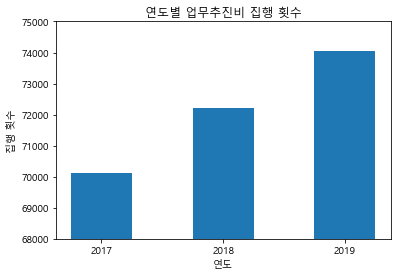

In [63]:
#먼저 막대그래프로 시각화
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

#막대그래프
plt.bar(year_expense.index, year_expense.values, tick_label = year_expense.index, width=0.5)
plt.title('연도별 업무추진비 집행 횟수')
plt.xlabel('연도')
plt.ylabel('집행 횟수')

plt.ylim(68000, 75000)

plt.show()

In [64]:
#피봇 테이블 pivot table
year_total = pd.pivot_table(df_expense_all, index=['집행연도'], values=['집행금액'], aggfunc=sum)
year_total

,집행금액
집행연도,
2017,9076941387
2018,9937556542
2019,10508713232


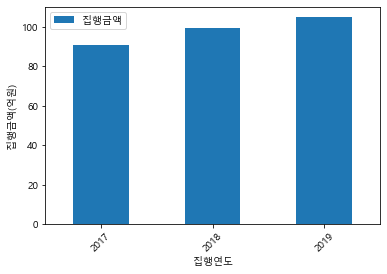

In [66]:
eok = 100000000
(year_total/eok).plot.bar(rot=45)
plt.ylabel('집행금액(억원)')
plt.show()

In [67]:
month_total = pd.pivot_table(df_expense_all, index=['집행월'], values=['집행금액'], aggfunc=sum)
month_total

,집행금액
집행월,
1,2328469179
2,2250971737
3,2314589911
4,2153704599
5,2063883588
6,2224855495
7,2372256669
8,2146192369
9,2413400065


In [68]:
#월별로 집행금액 추출
year_month_total = pd.pivot_table(df_expense_all, index=['집행월'], columns=['집행연도'], values=['집행금액'], aggfunc=sum)
year_month_total

집행금액                        
집행연도        2017        2018        2019
집행월                                     
1      710368860   735587570   882512749
2      712679864   769360005   768931868
3      737250454   761059010   816280447
4      635265805   703781418   814657376
5      647582378   669044701   747256509
6      758257342   690652154   775945999
7      701604626   788926477   881725566
8      661174850   730290532   754726987
9      806170700   769404957   837824408
10     637219943   827022975   856191180
11     843619171   960310221   909538692
12    1225747394  1532116522  1463121451

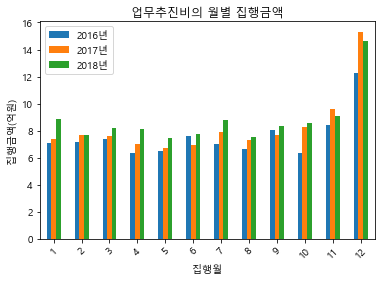

In [69]:
(year_month_total/eok).plot.bar(rot=45)
plt.ylabel('집행금액(억원)')
plt.title('업무추진비의 월별 집행금액')
plt.legend(['2016년', '2017년', '2018년'])
plt.show()

In [72]:
#부서별 집행 내역 분석
dept_level1_total = pd.pivot_table(df_expense_all, index=['부서레벨1'], values=['집행금액'],
                                   aggfunc=sum)
dept_level1_total

,집행금액
부서레벨1,
사업소,6552128899
서울시본청,16586817719
소방재난본부(소방서),5147645293
의회사무처,1236619250


In [73]:
dept_level2_total = pd.pivot_table(df_expense_all, index=['부서레벨2'], values=['집행금액'],
                                   aggfunc=sum)
dept_level2_total.head()

,집행금액
부서레벨2,
119특수구조단,119225100
감사위원회,343281170
강남소방서,229660520
강동소방서,188773330
강북소방서,167700000


In [74]:
#집행금액 많은 순으로 부서 정렬
dept_level2_top10 = dept_level2_total.sort_values(by=['집행금액'],ascending=False)[:10]
dept_level2_top10

,집행금액
부서레벨2,
상수도사업본부,2156404778
기획조정실,1572753168
행정국,1320839804
서울특별시장,955448760
시민소통기획관,923338423
도시기반시설본부,620669144
정무부시장,581806882
행정1부시장,540457390
행정2부시장,522277598


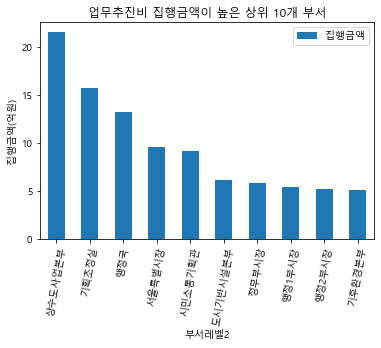

In [75]:
#위의 top 10을 막대 그래프로
(dept_level2_top10/eok).plot.bar(rot=80)
plt.ylabel('집행금액(억원)')
plt.title('업무추진비 집행금액이 높은 상위 10개 부서')
plt.show()

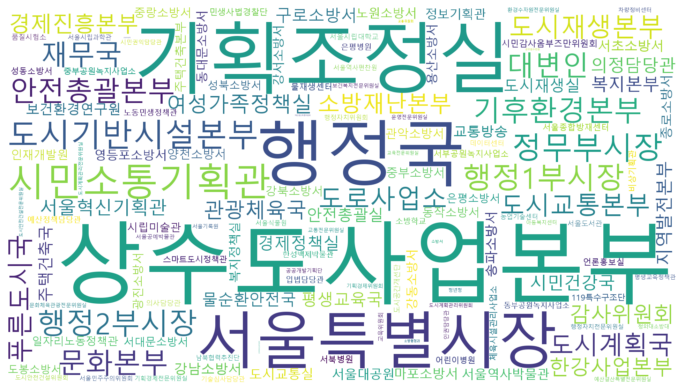

In [97]:
#업무추진비 집행금액이 큰 부서일수록 크게 표시
import matplotlib.pyplot as plt
from wordcloud import WordCloud

korean_font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

wc = WordCloud(font_path=korean_font_path, background_color='white',
              width=1920, height=1080)
frequencies = dept_level2_total['집행금액'] #pandas의 Series 형식이 됨
#기준은 '집행금액'
wordcloud_image = wc.generate_from_frequencies(frequencies)
plt.figure(figsize=(12,9))
plt.axis('off')
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.show()

In [98]:
#워드클라우드 이미지 저장 wordcloud save
img_name = 'C:\\users\\student\\mypy\\figures\\seoul_expenses.png'

wordcloud_image.to_file(img_name)

In [80]:
#요일별 및 시간대별 집행 내역 분석
df_expense_all['집행일시'].values

array(['2017-01-26 13:10', '2017-01-25 22:41', '2017-01-24 12:35', ...,
       '2019-11-28 13:13', '2019-11-28 12:53', '2019-12-06 13:54'],
      dtype=object)

In [81]:
#object 타입을 pd의 datetime 타입으로 변환
expense_date_time = pd.to_datetime(df_expense_all['집행일시'])
expense_date_time.values

array(['2017-01-26T13:10:00.000000000', '2017-01-25T22:41:00.000000000',
       '2017-01-24T12:35:00.000000000', ...,
       '2019-11-28T13:13:00.000000000', '2019-11-28T12:53:00.000000000',
       '2019-12-06T13:54:00.000000000'], dtype='datetime64[ns]')

In [82]:
weekday_name = ['월','화','수','목','금','토','일']

df_expense_all['집행일시_요일'] = [weekday_name[weekday] for weekday in expense_date_time.dt.weekday]
#여기서 dt.weekday는 pandas 안에 있는 것인 듯

In [84]:
df_expense_all['집행일시_시간'] = [hour for hour in expense_date_time.dt.hour]

In [85]:
df_expense_all.head(3)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일,집행일시_시간
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목,13
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수,22
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화,12


In [86]:
#요일별 업무추진비 집행 횟수
expense_weekday = df_expense_all['집행일시_요일'].value_counts()
expense_weekday

목    45652
화    43767
수    42309
금    41350
월    39470
토     2238
일     1602
Name: 집행일시_요일, dtype: int64

In [88]:
#reindex로 요일 차례대로 정렬
expense_weekday = expense_weekday.reindex(index=weekday_name)
expense_weekday

월    39470
화    43767
수    42309
목    45652
금    41350
토     2238
일     1602
Name: 집행일시_요일, dtype: int64

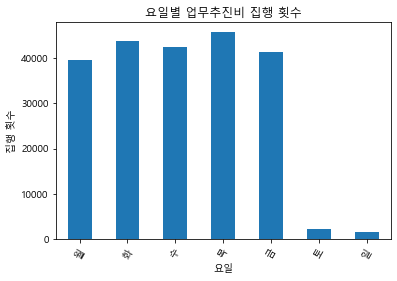

In [89]:
expense_weekday.plot.bar(rot=60)
plt.title('요일별 업무추진비 집행 횟수')
plt.xlabel('요일')
plt.ylabel('집행 횟수')
plt.show()

In [90]:
expense_hour_num = df_expense_all['집행일시_시간'].value_counts()
expense_hour_num

12    87462
20    22989
13    20952
19    16756
21    12195
11     8354
14     8305
15     7167
10     5822
18     5779
16     5170
0      4919
9      3485
17     2889
22     2555
8       874
7       411
23      127
1        44
6        42
3        27
4        26
5        19
2        19
Name: 집행일시_시간, dtype: int64

In [91]:
work_hour = [(k+8)%24 for k in range(24)]
#8시부터 시작
expense_hour_num = expense_hour_num.reindex(index=work_hour)
expense_hour_num

8       874
9      3485
10     5822
11     8354
12    87462
13    20952
14     8305
15     7167
16     5170
17     2889
18     5779
19    16756
20    22989
21    12195
22     2555
23      127
0      4919
1        44
2        19
3        27
4        26
5        19
6        42
7       411
Name: 집행일시_시간, dtype: int64

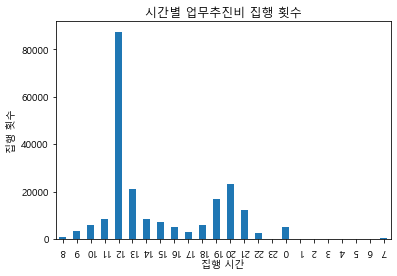

In [92]:
expense_hour_num.plot.bar(rot=180)
plt.title('시간별 업무추진비 집행 횟수')
plt.xlabel('집행 시간')
plt.ylabel('집행 횟수')
plt.show()

In [94]:
#집행횟수 아닌 집행금액 기준
expense_hour_total = pd.pivot_table(df_expense_all, index=['집행일시_시간'],
                                   values=['집행금액'], aggfunc=sum)
expense_hour_total.head()

,집행금액
집행일시_시간,
0,842523116
1,7024161
2,2265190
3,7215762
4,5818431
5,4418228
6,3458282
7,27471964
8,90244530


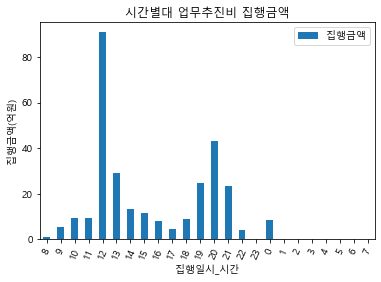

In [95]:
expense_hour_total = expense_hour_total.reindex(index=work_hour)

(expense_hour_total/eok).plot.bar(rot=66)
plt.ylabel('집행금액(억원)')
plt.title('시간별대 업무추진비 집행금액')
plt.show()